# Single Layer Perceptron training

Import everything that we will need to use:
    - numpy for vector calculations
    - matplotlib to visualise our results
    - time for benchmarking

In [53]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
import importlib

import dataset
import slp

importlib.reload(dataset)
importlib.reload(slp)

<module 'slp' from '/home/reafle/study/python/jupyter/mlp/slp.py'>

Load our simplified Iris sample learning set. 

We will use only 2 classes (mapped to 0 and 1) with 2 dimensions (for easy plotting and visualization)

In [5]:
cMap = { "Iris-setosa" : 1, "Iris-versicolor" : 0 }

def scanInputFile(filename, appendClass=False) :
    # define class map
    
    data = []
    with open(filename, 'r') as fHandle :
        for line in fHandle.readlines() :
            result = {}
            # grab one line data
            elements = [item for item in line[:-1].split(',')]

            # 1 as bias and flower data
            result["data"] = ([1] + [ float(item) for item in elements[:-1] ] )
            
            # Class value
            if appendClass :
                result["class"] = cMap[elements[-1]]
            
            # save everything
            data.append(result)
    return data

def getCoordinates(data, index, className=None) :
    if className != None:
        return [item['data'][index] for item in data if item['class'] == className]
    else :
        return [item['data'][index] for item in data]

trainingData = scanInputFile('../../iris-2d-train.txt', appendClass=True)
testData = scanInputFile('../../iris-2d-test.txt', False)
print(trainingData[0])
print(testData[0])

{'data': [1, 5.0, 3.6, 1.4, 0.2], 'class': 1}
{'data': [1, 5.1, 3.5, 1.4, 0.2]}


In [19]:
iris = dataset.Iris()    

iris.trainingData, iris.trainingDataResult = iris.scanInputFile('../../iris-2d-train.txt', setType='2d')
iris.testData, iris.testDataResult = iris.scanInputFile('../../iris-2d-test.txt', setType='2d')
print (iris.trainingData.shape)
print (iris.trainingDataResult.shape)

(80, 2)
(80, 1)


Lets code our SLP

Perform Training on our neural network

In [28]:
%debug


nn = slp.SingleLayerPerceptron(2)
#nn.w_ = np.zeros(nn.inUnits + 1)
#nn.w_ = [-1000,-1,-50,-100,-1000]

step = 0
limit = 2 #steps
plot_data = {}
epoch_data = []
iteration_data = []

# classify errors
e_ = len(iris.trainingData)
start = time.time()
#train network with given data
while e_ > 0 and step < limit:
    #re-init error count
    #print("NEW EPOCH")
    e_ = len(iris.trainingData)
    
    for set_index, dataset in enumerate(iris.trainingData):
        step = 0
        # plot_data[set_index] = getCoordinates(trainingData, 1)
        while step < limit:
            #print ("errors: %d, step %d, weights: %s" % (e_, step, nn.w_) )
            y = nn.propagate(iris.trainingData)
            if y == dataset['class'] :
                e_ -= 1
                #print('dataset %s LOOKS LIKE %d\n' % (dataset['data'], y) )
                break;
            else :
                e_ += 1
                step += 1
                nn.learn(dataset['data'], y, dataset['class']);
        iteration_data.append(step)
            
    epoch_data.append(e_)

stop = time.time()
                
print("Neural network trained! \n")
print("    Took %.4f ms" % (stop-start))
print("    Took %d epochs, %d iterations " % (len(epoch_data), sum(iteration_data)))
print("    Training data length: %d " % len(trainingData))
print("    Errors: %s " % e_)
print("    Weights: %s " % nn.w_)
print("    Plot data : %s " % plot_data)


> /home/reafle/study/python/jupyter/mlp/slp.py(10)propagate()
      8 
      9     def propagate(self, X) :
---> 10         result = np.dot(X, self.w_)
     11         return self.activation(result)
     12 

ipdb> X
array([[ 0.73529412,  0.81818182],
       [ 0.79411765,  0.88636364],
       [ 0.67647059,  0.77272727],
       [ 0.73529412,  0.77272727],
       [ 0.64705882,  0.65909091],
       [ 0.72058824,  0.70454545],
       [ 0.79411765,  0.84090909],
       [ 0.70588235,  0.77272727],
       [ 0.70588235,  0.68181818],
       [ 0.63235294,  0.68181818],
       [ 0.85294118,  0.90909091],
       [ 0.83823529,  1.        ],
       [ 0.79411765,  0.88636364],
       [ 0.75      ,  0.79545455],
       [ 0.83823529,  0.86363636],
       [ 0.75      ,  0.86363636],
       [ 0.79411765,  0.77272727],
       [ 0.75      ,  0.84090909],
       [ 0.67647059,  0.81818182],
       [ 0.75      ,  0.75      ],
       [ 0.70588235,  0.77272727],
       [ 0.73529412,  0.68181818],
       [ 

ValueError: shapes (80,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

### We now have a trained network ! 
We can plot the result and errors:

<IPython.core.display.Javascript object>


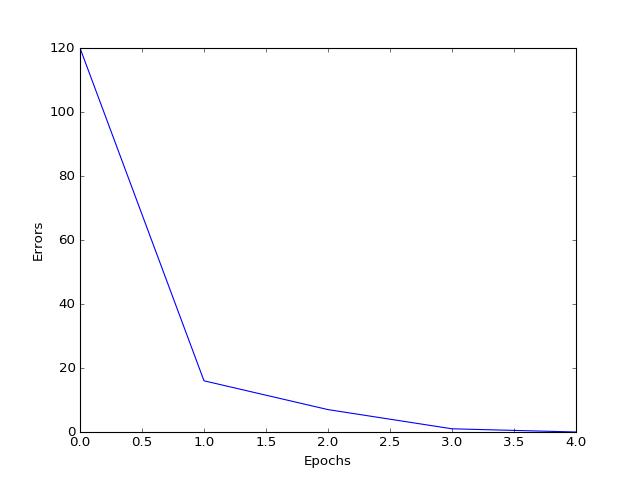

In [14]:
plt.cla()
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.plot(range(len(epoch_data)),epoch_data)


plt.show()


In [ ]:
plt.figure('Training result')
# class 1 points
xData = getCoordinates(trainingData, 1, 0)
yData = getCoordinates(trainingData, 2, 0)
plt.plot(xData, yData, 'ro')

# class 2 points
xData = getCoordinates(trainingData, 1, 1)
xData = getCoordinates(trainingData, 2, 1)
plt.plot(xData, yData, 'bo')

#decision boundary 
plt.plot(1, 2)
plt.show()

### And we can classify an unknown item

In [ ]:
for key, item in enumerate(testData) :
    print("%d item is %s " % (key+1, [k for k, i in cMap.items() if i == nn.propagate(item['data'])] )) 

## Testing space

In [52]:
a = [[3,5], [3,5]]
np.array_concantenate([1, a], axis=0)


AttributeError: 'module' object has no attribute 'array_concantenate'

In [176]:
l = [10, 97, 15 ]
plt.cla()
plt.hist([k for k,v in enumerate(l)], l)
plt.show()

<IPython.core.display.Javascript object>

ValueError: bins must increase monotonically.

In [142]:
print(time.time())
a = {1 : 'a'}
a.update({2 : 'b', 1 : 'c'})
a
print(time.time())

1463196843.0921593
1463196843.0925665


In [ ]:
?np.linspace

In [ ]:
np.linspace(-1,1)

In [ ]:
andNn = SingleLayerPerceptron(2,1)
print(andNn.weights)

i = 0
test = {'result': 1, 'data': [1, 0, 1] }
while True and (i < 1000):
    y = andNn.propagate(test["data"])
    if y == test["result"] :
        break
    else :
        i += 1
        andNn.learn(test['data'], y, test['result'])
        print("%d : " % i)
        print(andNn.weights)

#nn.weights = [1,1,1,1]
#y = nn.propagate(data)
print(y)


In [ ]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.veco(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')

In [175]:
l = [97, 15, 10]
print([k for k,v in enumerate(l)], l)

[0, 1, 2] [97, 15, 10]
